# Plotting C. elegans data for fig 1

Data obtained from Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans. Cell, 163(3), 656–669. http://doi.org/10.1016/j.cell.2015.09.034

In [1]:
# Importing all dependencies 
import numpy as np
import numpy as np
import torch
import subprocess
import os
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
import mne
from scipy.signal import butter, filtfilt
from scipy.signal import welch
from scipy.interpolate import CubicSpline
from scipy.io import loadmat
from sklearn.linear_model import Ridge
from scipy.signal import butter, filtfilt
from scipy.signal import savgol_filter



In [2]:
# Loading the Dataset
os.chdir("../")

data_path = 'worms/worm_data/WT_Stim.mat'
data = loadmat(data_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'AVA_HisCl', 'WT_NoStim', 'WT_Stim'])


In [3]:
# Working with the no stim condition -- WORM ONE
no_stim = data['WT_NoStim']
neuron_data = no_stim[0][0][0] #3137 timepoints, 109 neurons 

time = no_stim[0][0][4]
dt = time[1][0] - time[0][0]

m = neuron_data.shape[0] # number of timepoints
n = neuron_data.shape[1] #number of neurons 

neuron_data_cor = no_stim[0][0][1]

neuron_name = []
for i in range((n-1)):
    neuron_name.append(no_stim[0][0][3][0][i][0])

sr = no_stim[0][0][6]
# Movement Classifications;  
# ‘FWD’ forward crawling ‘SLOW’ forward slowing ‘DT’ dorsal post reversal turn ‘VT’ ventral post reversal turn 
# ‘REV1’ reverse crawling ‘REV2’ reverse crawling ‘REVSUS’ sustained reverse crawling ‘NOSTATE’ - ambiguous
FWD = no_stim[0][0][7][0][0][0]
SLOW = no_stim[0][0][7][0][0][1]
DT = no_stim[0][0][7][0][0][2]
VT = no_stim[0][0][7][0][0][3]
REV1 = no_stim[0][0][7][0][0][4]
REV2 = no_stim[0][0][7][0][0][5]
REVSUS = no_stim[0][0][7][0][0][6]
NOSTATE = no_stim[0][0][7][0][0][7]

print(m,n)
print(time[-1])
print(sr)


3137 109
[1079.65572203]
[[2.90462963]]


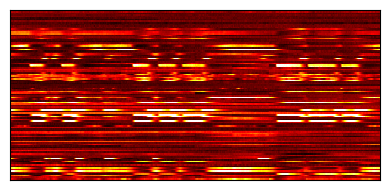

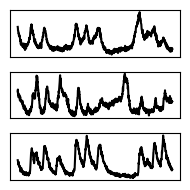

In [5]:
## Figure for main SHRED intro
data = neuron_data_cor[:1000, :].T

# Specify indices of the 3 neurons you want in 'hot' colormap
hot_neurons = [12, 29, 68]

# Set up figure
fig, ax = plt.subplots(figsize=(4, 2))

# Loop through each neuron and plot it as a 1-row image
for i in range(data.shape[0]):
    cmap = 'hot' if i in hot_neurons else 'hot'
    al = 1 if i in hot_neurons else 1
    ax.imshow(data[i:i+1, :], aspect='auto', cmap=cmap,
              extent=[0, 1000, i, i+1], vmin=0, vmax=1, alpha = al)
# Tidy up axes
ax.set_ylim(0, 109)
ax.set_xlim(0, 1000)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.invert_yaxis()  # Optional: so neuron 0 is at the top
plt.tight_layout()
plt.savefig('/home/amy/SHRED_neuro/worms/data_output/figs/heatmap_whole.png', transparent = True, dpi = 400)
plt.show()

fig, ax = plt.subplots(3, figsize = (2,2))
for k in range(3):
    ax[k].plot(data[hot_neurons[k], :1000], color = 'black')
    ax[k].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig('/home/amy/SHRED_neuro/worms/data_output/figs/trace_3.png', transparent = True, dpi = 400)
